[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ds-reboot/python-first-part/blob/main/notebooks/hometasks/Task2_dmrf_visual.ipynb)

# Задание
* Собрать информацию о всех строящихся объектах на сайте "наш.дом.рф"
* Cохранить результаты в pandas dataframe
<hr>

* Проверить состояние датафрейма и привести его в формат, позволяющий дальнейшее исследование данных:
-- Привести колонки датафрейма к одному типу данных
-- Проверить индекс, чтобы он соответствовал порядку строк
-- Проверить наличие пропусков и в случае обнаружения, определить стратегию их обработки
<hr>

* Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
-- Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
-- Рассчитать объемы вводимого жилья по регионам и по годам.
-- Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах
-- Визуализировать разброс, связь и распределение этих показателей по регионам
-- Сделать выводы по каждому из расчетов и графиков



In [1]:
import requests
import os
import csv
import pandas as pd
from tqdm.auto import tqdm
from bs4 import BeautifulSoup as bs
from urllib.parse import urljoin, urlparse
import datetime
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

import warnings
warnings.filterwarnings('ignore')

In [2]:
# установим параметры экрана
# pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

## Список объектов

In [3]:
# offset_ = 1
# limit_ = 1000
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/kn/object?offset={offset_}&limit={limit_}&sortField=devId.devShortCleanNm&sortType=asc&objStatus=0'
# res = requests.get(url)
# objects_data = res.json()

In [3]:
# загрузим датасет из ДЗ1
df = pd.read_csv('nash-dom-rf.csv')
df.head(5)

,hobjId,objId,developer,rpdRegionCd,objAddr,objFloorMin,objFloorMax,objElemLivingCnt,objReady100PercDt,objSquareLiving,objCompensFundFlg,objProblemFlg,latitude,longitude,problemFlag,siteStatus,objGuarantyEscrowFlg,residentialBuildings,rpdNum,pdId,buildType,objStatus,objCommercNm,complexShortName
0,37219,13391,2МЕН ГРУПП,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,4297.44,1,0,57.1541,65.5595,NONE,Строящиеся,0,1,72-000096,28101,Жилое,0,NaN,NaN
1,39024,13383,2МЕН ГРУПП,72,г Тюмень,4,20,68,2022-12-31,6296.55,1,0,57.1519,65.5536,NONE,Строящиеся,0,1,72-000095,28105,Жилое,0,NaN,NaN
2,37165,13398,2МЕН ГРУПП,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,4812.98,0,0,57.1519,65.5544,NONE,Строящиеся,0,1,72-000097,28141,Жилое,0,NaN,NaN
3,37201,13397,2МЕН ГРУПП,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,6248.51,0,0,57.1519,65.5544,NONE,Строящиеся,0,1,72-000097,28141,Жилое,0,NaN,NaN
4,34754,13399,2МЕН ГРУПП,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,0.00,0,0,57.1519,65.5544,NONE,Строящиеся,0,0,72-000097,28141,Нежилое,0,NaN,NaN


# Данные по определенному объекту

In [5]:
# url = f'https://xn--80az8a.xn--d1aqf.xn--p1ai/%D1%81%D0%B5%D1%80%D0%B2%D0%B8%D1%81%D1%8B/api/object/36774'

In [4]:
# загрузим датасет из ДЗ1
df2 = pd.read_csv('nash-dom-rf1.csv')
df2.head(5)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objLivCeilingHeight,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,airQualityIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm,complexShortNm,greenAreaIndexValue
0,13391,37219,28101,72,"г Тюмень, ул Профсоюзная",3,12,44,2022-12-31,Другое,По желанию заказчика,Есть,41,4297.44,72-000096,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:04,57.1541,65.5595,1,0,Элитный,12-12-2022 01:20,"[{'objId': 13391, 'pdId': 28101, 'rpdId': 6674...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37219,12,44,4297.44,26,0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,9.0,1,1,0.0,2.0,2.0,6,0.450622,55893.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,[],False,info@2mengroup.ru,0,B,9.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,11.0,16.0,12.0,5.0,44.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13383,39024,28105,72,г Тюмень,4,20,68,2022-12-31,Другое,По желанию заказчика,Есть,31,6296.55,72-000095,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,09-12-2022 15:05,57.1519,65.5536,1,0,Элитный,12-12-2022 01:20,"[{'objId': 13383, 'pdId': 28105, 'rpdId': 6674...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,39024,20,68,6296.55,10,0,True,28-02-2023 12:00,"2,8",0,1.0,1.0,1.0,0.0,11.0,1,1,0.0,5.0,1.0,7,0.406985,53109.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",667500,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,13.0,2

Text(0.5, 1.0, 'Пропущенные значения')

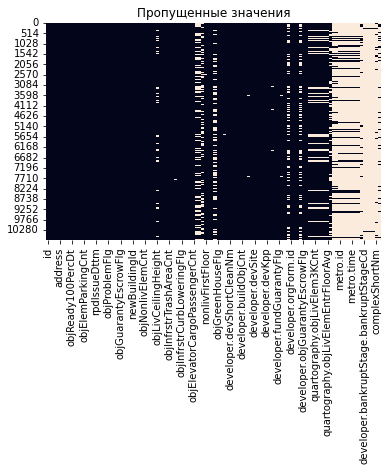

In [5]:
# строим график пропущенных значений
sns.heatmap(df2.isnull(), cbar = False).set_title("Пропущенные значения")

In [6]:
# выберем необходимые столбцы
df3 = df2[['id', 'developer.devShortCleanNm', 'region', 'developer.regRegionDesc', 'address', 'objLkClassDesc',
     'wallMaterialShortDesc', 'objLkFinishTypeDesc', 'objReady100PercDt', 'soldOutPerc', 'objElemParkingCnt',
     'objElemLivingCnt', 'objSquareLiving',  'floorMax', 'objPriceAvg']]
df3

,id,developer.devShortCleanNm,region,developer.regRegionDesc,address,objLkClassDesc,wallMaterialShortDesc,objLkFinishTypeDesc,objReady100PercDt,soldOutPerc,objElemParkingCnt,objElemLivingCnt,objSquareLiving,floorMax,objPriceAvg
0,13391,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная",Элитный,Другое,По желанию заказчика,2022-12-31,0.450622,41,44,4297.44,12,55893.0
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2022-12-31,0.406985,31,68,6296.55,20,53109.0
2,13398,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,1.000000,0,43,4812.98,10,47886.0
3,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12,45523.0
4,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1,50768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10787,28071,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.071155,0,288,14870.40,26,85604.0
10788,28070,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2025-03-31,0.072883,0,768,29620.10,26,85309.0
10789,28073,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.070834,0,312,14872.80,26,85634.0
10790,44447,ЯРОСЛАВЛЬЗАКАЗЧИК,76,Ярославская область,"г Ярославль, Фрунзенский район, территория в р...",Типовой,Кирпич,Другое,2022-12-31,0.255401,0,127,6764.22,6,70681.0


In [7]:
# меняем имена столбцов
df3.rename(columns = {'id': 'id дома', 'developer.devShortCleanNm': 'застройщик', 'region': 'номер региона',
                      'developer.regRegionDesc': 'название региона', 'address': 'адрес дома',
                      'objLkClassDesc': 'класс недвижимости', 'wallMaterialShortDesc': 'материал стен',
                      'objLkFinishTypeDesc': 'тип отделки', 'objReady100PercDt': 'ввод в эксплуатацию',
                      'soldOutPerc': 'распроданность квартир', 'objElemParkingCnt':'количество мест в паркинге',
                       'objElemLivingCnt': 'количество квартир', 'objSquareLiving': 'жилая площадь', 
                      'floorMax': 'количество этажей', 'objPriceAvg': 'средняя цена за 1 м²'}, inplace=True)
df3

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,13391,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная",Элитный,Другое,По желанию заказчика,2022-12-31,0.450622,41,44,4297.44,12,55893.0
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2022-12-31,0.406985,31,68,6296.55,20,53109.0
2,13398,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,1.000000,0,43,4812.98,10,47886.0
3,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12,45523.0
4,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1,50768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10787,28071,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.071155,0,288,14870.40,26,85604.0
10788,28070,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2025-03-31,0.072883,0,768,29620.10,26,85309.0
10789,28073,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.070834,0,312,14872.80,26,85634.0
10790,44447,ЯРОСЛАВЛЬЗАКАЗЧИК,76,Ярославская область,"г Ярославль, Фрунзенский район, территория в р...",Типовой,Кирпич,Другое,2022-12-31,0.255401,0,127,6764.22,6,70681.0


In [8]:
# смотрим инфу по датасету
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10792 entries, 0 to 10791
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id дома                     10792 non-null  int64  
 1   застройщик                  10792 non-null  object 
 2   номер региона               10792 non-null  int64  
 3   название региона            10683 non-null  object 
 4   адрес дома                  10766 non-null  object 
 5   класс недвижимости          10792 non-null  object 
 6   материал стен               10792 non-null  object 
 7   тип отделки                 10792 non-null  object 
 8   ввод в эксплуатацию         10792 non-null  object 
 9   распроданность квартир      7600 non-null   float64
 10  количество мест в паркинге  10792 non-null  int64  
 11  количество квартир          10792 non-null  int64  
 12  жилая площадь               10792 non-null  float64
 13  количество этажей           107

In [9]:
# описательная характеристика датасета
df3.describe(include = "all")

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
count,10792.000000,10792,10792.000000,10683,10766,10792,10792,10792,10792,7600.000000,10792.000000,10792.000000,10792.000000,10792.000000,7.594000e+03
unique,NaN,3604,NaN,82,8588,5,6,5,60,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,СЗ ГЕЛЕОН СТРОЙ,NaN,Москва город,г Санкт-Петербург,Комфорт,Монолит-кирпич,Без отделки,2023-12-31,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,139,NaN,1099,97,5519,5731,5329,1532,NaN,NaN,NaN,NaN,NaN,NaN
mean,40005.543736,NaN,47.941253,NaN,NaN,NaN,NaN,NaN,NaN,0.435591,37.274277,188.586546,9343.246554,12.471831,1.198356e+05
std,9860.217407,NaN,23.384108,NaN,NaN,NaN,NaN,NaN,NaN,0.344209,117.513368,233.454251,11233.670333,8.402815,1.204491e+05
min,1259.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000064,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,37929.750000,NaN,25.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.106441,0.000000,40.000000,2083.805000,5.000000,6.687850e+04
50%,43204.500000,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.381289,0.000000,120.000000,6332.230000,11.000000,9.153350e+04
75%,46553.250000,NaN,69.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.743252,0.000000,253.000000,12483.257500,18.000000,1.346605e+05


In [10]:
# смотрим уникальность колонок
df3.nunique()

id дома                       10783
застройщик                     3604
номер региона                    81
название региона                 82
адрес дома                     8588
класс недвижимости                5
материал стен                     6
тип отделки                       5
ввод в эксплуатацию              60
распроданность квартир         6941
количество мест в паркинге      527
количество квартир              946
жилая площадь                  7765
количество этажей                62
средняя цена за 1 м²           6935
dtype: int64

In [11]:
#  считаем количестово пропущенных значений
df3.isna().sum()

id дома                          0
застройщик                       0
номер региона                    0
название региона               109
адрес дома                      26
класс недвижимости               0
материал стен                    0
тип отделки                      0
ввод в эксплуатацию              0
распроданность квартир        3192
количество мест в паркинге       0
количество квартир               0
жилая площадь                    0
количество этажей                0
средняя цена за 1 м²          3198
dtype: int64

In [12]:
# количество столбцов, которые имеют хотя бы одно пропущенное значение
len(df3.columns[df3.isna().any()].tolist())

4

In [13]:
# изменяем форман с object на datetime
df3['ввод в эксплуатацию'] = pd.to_datetime(df3['ввод в эксплуатацию'], dayfirst=True)

In [15]:
# выбираем дома где 'количество мест в паркинге' / 'распроданность квартир'  NaN и устанавливаем 0 
df3['количество мест в паркинге'].fillna(0, inplace = True)
df3['распроданность квартир'].fillna(0, inplace = True)

In [16]:
# смотрим инфу по датасету
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10792 entries, 0 to 10791
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id дома                     10792 non-null  int64         
 1   застройщик                  10792 non-null  object        
 2   номер региона               10792 non-null  int64         
 3   название региона            10683 non-null  object        
 4   адрес дома                  10766 non-null  object        
 5   класс недвижимости          10792 non-null  object        
 6   материал стен               10792 non-null  object        
 7   тип отделки                 10792 non-null  object        
 8   ввод в эксплуатацию         10792 non-null  datetime64[ns]
 9   распроданность квартир      10792 non-null  float64       
 10  количество мест в паркинге  10792 non-null  int64         
 11  количество квартир          10792 non-null  int64     

In [17]:
df3

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,13391,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная",Элитный,Другое,По желанию заказчика,2022-12-31,0.450622,41,44,4297.44,12,55893.0
1,13383,2МЕН ГРУПП,72,Тюменская область,г Тюмень,Элитный,Другое,По желанию заказчика,2022-12-31,0.406985,31,68,6296.55,20,53109.0
2,13398,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,1.000000,0,43,4812.98,10,47886.0
3,13397,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.999984,0,65,6248.51,12,45523.0
4,13399,2МЕН ГРУПП,72,Тюменская область,"г Тюмень, ул Профсоюзная, д. 56",Элитный,Другое,Без отделки,2024-12-31,0.917243,125,0,0.00,1,50768.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10787,28071,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.071155,0,288,14870.40,26,85604.0
10788,28070,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2025-03-31,0.072883,0,768,29620.10,26,85309.0
10789,28073,ЯРКИЙ МИР,50,Московская область,"г Котельники, район мкр.Ковровый, д.1-5, 24-29...",Типовой,Другое,Под ключ,2024-06-30,0.070834,0,312,14872.80,26,85634.0
10790,44447,ЯРОСЛАВЛЬЗАКАЗЧИК,76,Ярославская область,"г Ярославль, Фрунзенский район, территория в р...",Типовой,Кирпич,Другое,2022-12-31,0.255401,0,127,6764.22,6,70681.0


In [18]:
df3.describe()

,id дома,номер региона,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
count,10792.000000,10792.000000,10792.000000,10792.000000,10792.000000,10792.000000,10792.000000,7.594000e+03
mean,40005.543736,47.941253,0.306754,37.274277,188.586546,9343.246554,12.471831,1.198356e+05
std,9860.217407,23.384108,0.350654,117.513368,233.454251,11233.670333,8.402815,1.204491e+05
min,1259.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+03
25%,37929.750000,25.000000,0.000000,0.000000,40.000000,2083.805000,5.000000,6.687850e+04
50%,43204.500000,50.000000,0.138264,0.000000,120.000000,6332.230000,11.000000,9.153350e+04
75%,46553.250000,69.000000,0.592112,0.000000,253.000000,12483.257500,18.000000,1.346605e+05
max,49476.000000,92.000000,1.000000,3580.000000,2676.000000,142978.700000,76.000000,2.228709e+06


In [18]:
# Провести мини-исследование рынка строящейся недвижимости в одном или нескольких регионах
# с помощью pandas, matplotlib, seaborn, plotly и других инструментов.

In [19]:
# выберем Смоленскую, Калужскую, Тверьскую и Брянскую области
sktb = df3.loc[(df3['номер региона'] == 67) | (df3['номер региона'] == 40) | 
                (df3['номер региона'] == 69) | (df3['номер региона'] == 32)]
sktb = sktb.reset_index()
sktb = sktb.drop(['index'],axis=1)
sktb

,id дома,застройщик,номер региона,название региона,адрес дома,класс недвижимости,материал стен,тип отделки,ввод в эксплуатацию,распроданность квартир,количество мест в паркинге,количество квартир,жилая площадь,количество этажей,средняя цена за 1 м²
0,40008,ГК ЖБИ-2,69,Тверская область,"г Тверь, переулок 1-ый Вагонников, д. 6",Комфорт,Кирпич,Без отделки,2023-06-30,1.000000,0,79,4765.50,11,38946.0
1,41000,ГК ЖБИ-2,69,Тверская область,"г Тверь, переулок 1-ый Вагонников, д. 6",Комфорт,Кирпич,Без отделки,2023-06-30,0.020472,0,55,3111.50,8,47400.0
2,5120,ЖИРАФ И К,69,Тверская область,"г Тверь, улица Терещенко, д. 6, корпус 4",Типовой,Другое,По желанию заказчика,2022-12-31,1.000000,0,79,4097.10,16,41180.0
3,48244,ЖК РЕЧНОЙ,32,Брянская область,г Брянск,Комфорт,Монолит-кирпич,Без отделки,2025-12-31,0.000000,0,129,6737.99,21,NaN
4,40676,ИСК ФИНАНСИНВЕСТ,69,Москва город,г Тверь,Типовой,Монолит-кирпич,Без отделки,2023-09-30,0.722755,0,231,14082.92,23,69542.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,25395,ТКЗ,69,Тверская область,"г Тверь, Михаила Румянцева, д. 42",Типовой,Кирпич,Без отделки,2022-12-31,0.938712,0,80,4416.21,10,55416.0
271,34611,УНИМАРКЕТ,40,Калужская область,"г Калуга, улица Кутузова, д. 14 16",Комфорт,Кирпич,Без отделки,2023-03-31,0.890705,0,12,979.00,6,57912.0
272,42543,ФОНД ПОДДЕРЖКИ СТРОИТЕЛЬСТВА ДОСТУПНОГО ЖИЛЬЯ ...,40,Калужская область,"п Воротынск, ул Сиреневый Бульвар, д. 8, строе...",Типовой,Другое,Без отделки,2022-12-31,0.072988,0,60,3148.20,6,32661.0
273,37772,ЦЕНТРСТРОЙ,69,Тверская область,"г Тверь, ул Гончаровой, д. 34",Комфорт,Кирпич,Без отделки,2023-06-30,0.000000,0,0,0.00,1,NaN


In [20]:
sktb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275 entries, 0 to 274
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   id дома                     275 non-null    int64         
 1   застройщик                  275 non-null    object        
 2   номер региона               275 non-null    int64         
 3   название региона            275 non-null    object        
 4   адрес дома                  275 non-null    object        
 5   класс недвижимости          275 non-null    object        
 6   материал стен               275 non-null    object        
 7   тип отделки                 275 non-null    object        
 8   ввод в эксплуатацию         275 non-null    datetime64[ns]
 9   распроданность квартир      275 non-null    float64       
 10  количество мест в паркинге  275 non-null    int64         
 11  количество квартир          275 non-null    int64         

Text(0.5, 1.0, 'Пропущенные значения')

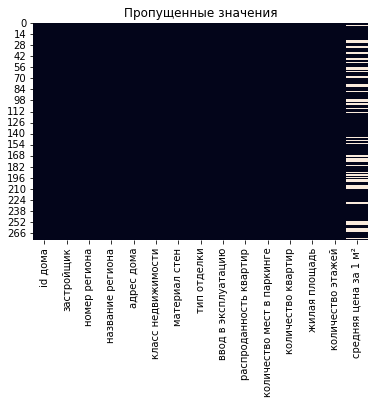

In [21]:
# строим график пропущенных значений
sns.heatmap(sktb.isnull(), cbar = False).set_title("Пропущенные значения")

In [22]:
# нестыковка (неместные застройщики в сторонних регионах)
sktb.groupby('номер региона')[['название региона']].value_counts()

номер региона  название региона    
32             Брянская область        59
               Москва город             2
40             Калужская область       41
               Московская область      17
               Смоленская область      10
               Москва город             3
               Брянская область         1
67             Смоленская область      55
               Московская область       2
               Свердловская область     1
69             Тверская область        71
               Москва город             6
               Московская область       5
               Рязанская область        2
dtype: int64

In [23]:
# количество строящихся домов по регионам
g1 =sktb['номер региона'].value_counts()
g1

69    84
40    72
32    61
67    58
Name: номер региона, dtype: int64

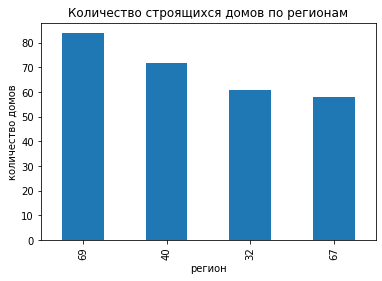

In [24]:
g1.plot(kind='bar')
plt.xlabel('регион')
plt.ylabel('количество домов')
plt.title("Количество строящихся домов по регионам")
plt.show()

In [25]:
# Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
# Любые значения NaN автоматически пропускаются (не трогаем).
g2 = sktb.groupby('номер региона')['средняя цена за 1 м²'].agg(['min', 'max', 'mean']).sort_values('mean')
g2

,min,max,mean
номер региона,,,
67,15337.0,83941.0,52489.180000
32,21851.0,89529.0,61777.355556
69,15592.0,118689.0,69211.734694
40,25897.0,174545.0,80812.346154


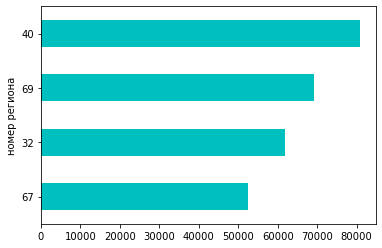

In [26]:
g2['mean'].plot(kind='barh', color='c')
plt.show()

In [26]:
# Вывод: самые дорогие квартиры в Калужской области, самые дешевые в Смоленской области

In [27]:
# Рассчитать объемы вводимого жилья по регионам и по годам.
g = (sktb.groupby(sktb['номер региона'])[['жилая площадь']].sum()).sort_values('жилая площадь')
g

,жилая площадь
номер региона,
67,305306.54
32,479669.39
69,484099.73
40,489570.36


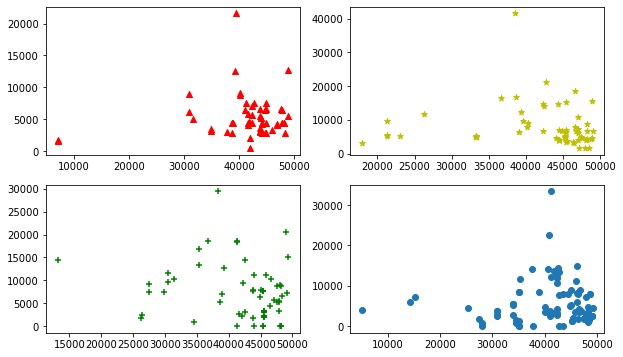

In [28]:
# sktb['средняя цена за 1 м²'].fillna(0, inplace = True)
fig, ax = plt.subplots(nrows=2,ncols=2)
ax1, ax2, ax3, ax4 = ax.flatten()
ax1.scatter(sktb.loc[sktb['номер региона'] == 67]['id дома'],sktb.loc[sktb['номер региона'] == 67]['жилая площадь'],color='r', marker="^")
ax2.scatter(sktb.loc[sktb['номер региона'] == 32]['id дома'],sktb.loc[sktb['номер региона'] == 32]['жилая площадь'],color='y', marker="*")
ax3.scatter(sktb.loc[sktb['номер региона'] == 40]['id дома'],sktb.loc[sktb['номер региона'] == 40]['жилая площадь'],color='g',marker="+")
ax4.scatter(sktb.loc[sktb['номер региона'] == 69]['id дома'],sktb.loc[sktb['номер региона'] == 69]['жилая площадь'])
fig.set_size_inches(10,6)

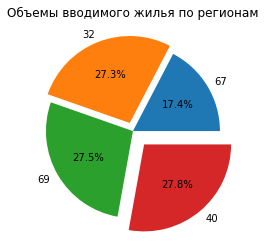

In [29]:
v = g['жилая площадь']
labels = g.index
explode = [0, 0.1, 0, 0.2]
plt.pie(v, labels=labels, explode=explode, autopct="%1.1f%%")
plt.title("Объемы вводимого жилья по регионам")
plt.show()

In [28]:
# Вывод: больше всего строят жилой площади в Брянской области

In [30]:
# посчитаем количество лет дома от сегодня до ввода в эксплуатацию ввод в эксплуатацию
today = datetime.combine(date.today(), datetime.min.time()) # сегодня
sktb['срок'] = sktb['ввод в эксплуатацию'].apply(lambda x: (x - today).days / 365)

In [31]:
# посчитаем средний срок до ввода домов в эксплуатацию по регионам
today = datetime.combine(date.today(), datetime.min.time()) # сегодня
g3 = sktb.groupby(['номер региона'])[['срок']].agg(['count', 'mean'])
g3

срок          
              count      mean
номер региона                
32               61  1.134786
40               72  0.749277
67               58  1.224988
69               84  0.946934

In [31]:
# Вывод: Быстрее всего строят в Калужской области

In [56]:
fig = px.bar(x=g3.index.astype(str), y=g3['срок']['mean'])
fig.update_layout(title="Средний срок до ввода домов в эксплуатацию по регионам",
                  xaxis_title="Регион",
                  yaxis_title="Средний срок",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [43]:
fig = px.scatter(x=sktb['id дома'], y=sktb['ввод в эксплуатацию'])
fig.update_layout(title="Ввод домов в эксплуатацию по регионам",
                  xaxis_title="id дома",
                  yaxis_title="Год ввода",
                  margin=dict(l=0, r=0, t=30, b=0))
fig.show()

In [34]:
# Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест
# и цену за квадратный метр в разных регионах
sktb.groupby(['номер региона'])[['количество этажей', 'жилая площадь','количество мест в паркинге',
                                'средняя цена за 1 м²']].mean()

,количество этажей,жилая площадь,количество мест в паркинге,средняя цена за 1 м²
номер региона,,,,
32,11.131148,7863.432623,1.180328,61777.355556
40,10.375000,6799.588333,15.041667,80812.346154
67,9.913793,5263.905862,5.327586,52489.180000
69,11.357143,5763.092024,4.273810,69211.734694


In [35]:
g4 = sktb.groupby(['номер региона'])[['количество этажей', 'жилая площадь','количество мест в паркинге',
                                'средняя цена за 1 м²']].agg(['min', 'max', 'mean', 'median'])
g4

количество этажей                       жилая площадь            \
                            min max       mean median           min       max   
номер региона                                                                   
32                            3  22  11.131148   11.0       1630.05  41571.04   
40                            1  26  10.375000   10.0          0.00  29464.60   
67                            3  17   9.913793   11.0        439.10  21601.99   
69                            1  26  11.357143   11.0          0.00  33422.95   

                                     количество мест в паркинге       \
                      mean    median                        min  max   
номер региона                                                          
32             7863.432623  5422.520                          0   42   
40             6799.588333  5592.690                          0  300   
67             5263.905862  4376.365                          0   96   
69             5763.092024  4177.555                          0   88   

                                средняя цена за 1 м²                          \
                    mean median                  min       max          mean   
номер региона                                                                  
32              1.180328    0.0              21851.0   89529.0  61777.355556   
40             15.041667    0.0              25897.0  174545.0  80812.346154   
67              5.327586    0.0              15337.0   83941.0  52489.180000   
69              4.273810    0.0              15592.0  118689.0  69211.734694   

                        
                median  
номер региона           
32             66983.0  
40             83199.5  
67             55428.5  
69             68879.0

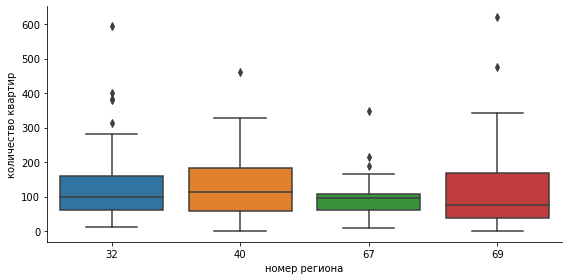

In [36]:
sns.catplot(
    x='номер региона', 
    y='количество квартир', 
    data=sktb, 
    kind='box', 
    height=4, 
    aspect=2
); 

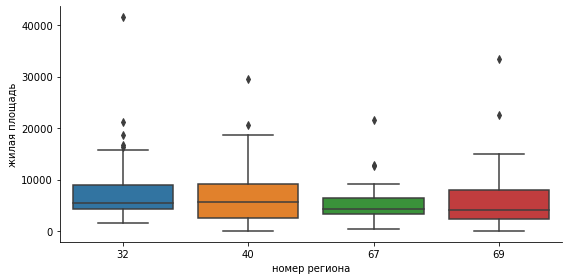

In [37]:
sns.catplot(
    x='номер региона', 
    y='жилая площадь', 
    data=sktb, 
    kind='box', 
    height=4, 
    aspect=2
); 

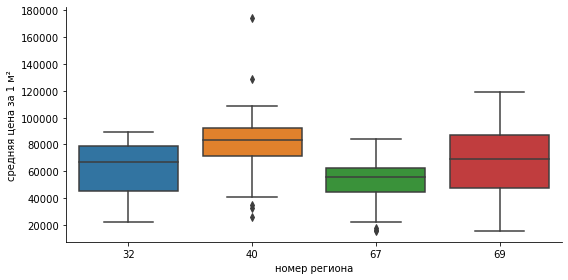

In [38]:
sns.catplot(
    x='номер региона', 
    y='средняя цена за 1 м²', 
    data=sktb, 
    kind='box', 
    height=4, 
    aspect=2
); 